<a href="https://colab.research.google.com/github/hjhan1201/AIFFEL_Online_Quest/blob/main/ML_Practice6_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.36198848 0.1920749 ]
0.5540633835693531
[0.3400206  0.15239134]
0.4924119400154383


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [12.5, 12.5, 61.875, 61.875]],
 'dcoord': [[0.0, 30.991512411471362, 30.991512411471362, 0.0],
  [0.0, 147.877877959848, 147.877877959848, 30.991512411471362],
  [0.0, 48.02737852215087, 48.02737852215087, 0.0],
  [0.0, 88.07194000276101, 88.07194000276101, 48.02737852215087],
  [0.0, 135.87135248973354, 135.87135248973354, 88.07194000276101],
  [0.0, 190.03011431770972, 190.03011431770972, 0.0],
  [135.87135248973354,
   461.0158736911475,
   461.0158736911475,
   190.03011431770972],
  [147.877877959848, 1026.396544382853, 1026.396544382853, 461.0158736911475]],
 'ivl': ['2', '0', '1', '4', '8', '5', '6', '3', '7'],
 'leaves': [2, 0, 1, 4, 8, 5, 6, 3, 7],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C

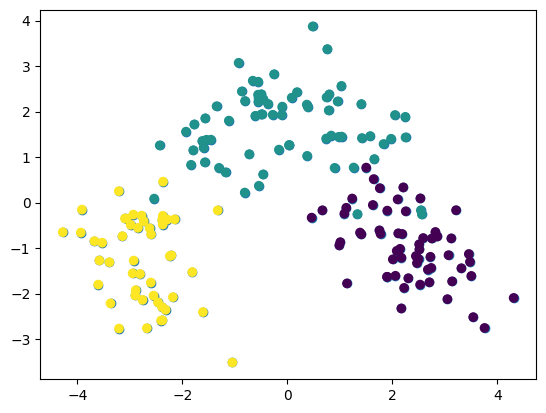

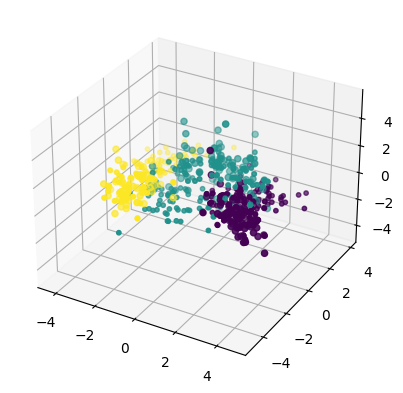

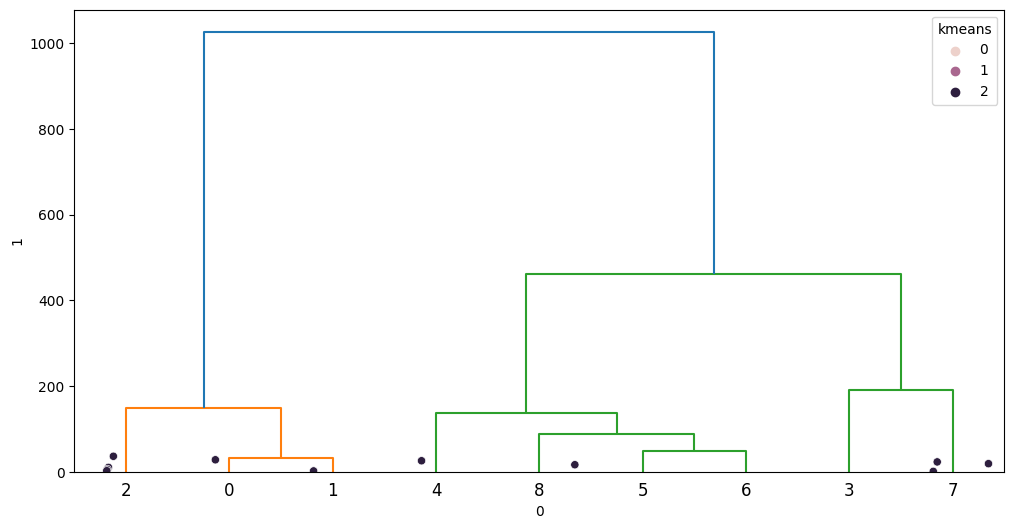

In [45]:
##비지도학습
##차원축소
#PCA(차원수를 줄임)
import pandas as pd
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data.head()
#스탠다드 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
df = data.copy()
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

# PCA 시각화
import matplotlib.pyplot as plt
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=dataset.target)

#데이터 설명력
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

#PCA전과 후를 지도학습과 비교(랜덤포레스트로)
#PCA 후
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(random_state=2022)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean()
#PCA 전
cross_val_score(model, data, dataset.target, scoring='accuracy', cv=5).mean()

# PCA 시각화(3차원)
df = data.copy()
pca = PCA(n_components=3)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c=dataset.target)

#점진적 PCA (데이터 셋이 매우 큰 경우)
from sklearn.decomposition import IncrementalPCA
df = data.copy()
pca = IncrementalPCA(n_components=2, batch_size=16)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c = dataset.target, s=10)
#데이터 설명력
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

#희소 PCA
from sklearn.decomposition import SparsePCA
df = data.copy()
pca=SparsePCA(n_components=2, alpha=0.01)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c = dataset.target, s=10)

#커널PCA
from sklearn.decomposition import KernelPCA
df = data.copy()
pca=KernelPCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c = dataset.target, s=10)

#SVD 특이값 분해
from sklearn.decomposition import TruncatedSVD
df = data.copy()
pca=TruncatedSVD(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c = dataset.target, s=10)

#군집(clustering)
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)
df['target'] = dataset.target
df['pred'] = pred

#군집 시각화
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)
df['kmeans'] = pred
df.columns = df.columns.astype(str)

#중심점찾기
centers = kmeans.cluster_centers_
#시각화
# import seaborn as sns
plt.figure(figsize=(12,6))
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1],hue=df['kmeans'])
plt.scatter(centers[:,0],centers[:,1])
#군집수 찾기(기울기가 완만해질때쯤)
inertia=[]
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, random_state = 2022)
  kmeans.fit(df)
  inertia.append(kmeans.inertia_)
plt.plot(range(1,10),inertia)

#계층적 군집분석
#덴드로그램
from scipy.cluster.hierarchy import dendrogram, ward
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
#데이터 샘플링
kdata = df[:3].copy()
kdata = kdata.append(df[70:73])
kdata = kdata.append(df[160:163])

dataset.target[0:3]
dataset.target[70:73]
dataset.target[160:163]
kdata
#덴드로그램 만들기
linkage = ward(kdata)
dendrogram(linkage)